In [1]:
%matplotlib inline
import networkx as nx
import itertools
import random

# 二部グラフの最大マッチングに対する強双対性

In [2]:
# 考える二部グラフのデータ
setA = [1, 2, 3, 4, 5, 6]
setB = [7, 8, 9, 10, 11, 12]
edges = [(1,7), (1,8), (1,9), (2,9), (3,9), (3,10), (4,10), (4,11), (4,12), (5,10), (5,12), (6,11)]

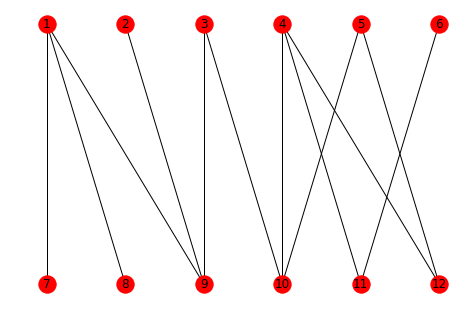

In [3]:
# 二部グラフの構成
G1 = nx.Graph()
G1.add_nodes_from(setA)
G1.add_nodes_from(setB)
G1.add_edges_from(edges)
mypos1 = {}
for i in range(0, len(setA)):
    mypos1[setA[i]] = (10*i, 20)
for i in range(0, len(setB)):
    mypos1[setB[i]] = (10*i, 10)
nx.draw(G1, pos = mypos1, with_labels=True)

In [4]:
# 最大マッチングの計算
m1 = nx.max_weight_matching(G1)
print(m1)

set([(9, 2), (8, 1), (12, 4), (10, 3), (11, 6)])


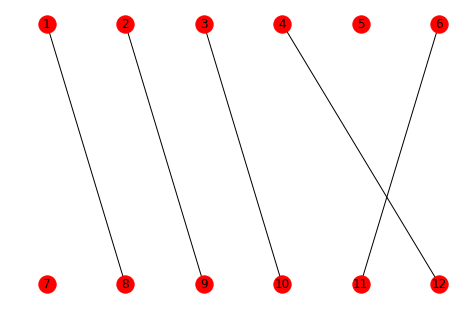

In [5]:
# 最大マッチングの描画
G1m = nx.Graph()
G1m.add_nodes_from(setA)
G1m.add_nodes_from(setB)
for e in m1:
    G1m.add_edge(*e)
nx.draw(G1m, pos = mypos1, with_labels=True)

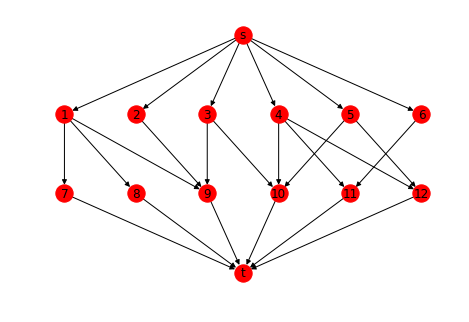

In [6]:
# 最小頂点被覆を計算するための準備：容量付き有向グラフの作成
G1f = nx.DiGraph()
G1f.add_nodes_from(setA)
G1f.add_nodes_from(setB)
G1f.add_nodes_from(['s', 't'])
for e in edges:
    G1f.add_edge(e[0], e[1], capacity=float("inf"))
for v in setA:
    G1f.add_edge('s', v, capacity=1)
for v in setB:
    G1f.add_edge(v, 't', capacity=1)
mypos1f = {}
for v in setA:
    mypos1f[v] = mypos1[v]
for v in setB:
    mypos1f[v] = mypos1[v]
mypos1f['s'] = ((len(setA)-1)*5, 30)
mypos1f['t'] = ((len(setB)-1)*5, 0)
nx.draw(G1f, pos = mypos1f, with_labels=True)

In [7]:
# 最小s,tカットの計算
c1 = nx.minimum_cut(G1f, 's', 't')
print(c1)

(5, (set([2, 3, 4, 5, 6, 9, 10, 11, 12, 's']), set([8, 1, 't', 7])))


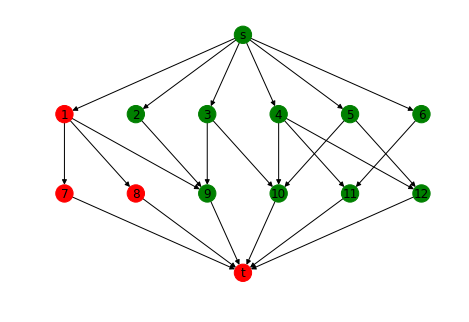

In [8]:
# 最小s,tカットの描画
nodecolor_c = list(map(lambda v: 'g' if v in c1[1][0] else 'r', G1f.nodes()))
nx.draw(G1f, pos = mypos1f, node_color = nodecolor_c, with_labels=True)

In [9]:
# 最小s,tカットを最小頂点被覆に変換
vc1 = (set(setA) - c1[1][0]) | (set(setB) & c1[1][0])
print(vc1)

set([1, 10, 11, 12, 9])


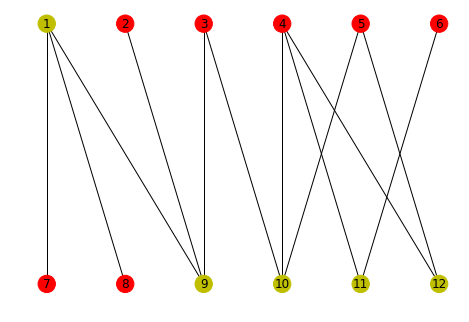

In [10]:
# 最小頂点被覆の描画
nodecolor_vc = list(map(lambda v: 'y' if v in vc1 else 'r', G1f.nodes()))
nx.draw(G1, pos = mypos1, node_color = nodecolor_vc, with_labels=True)

# Hallの結婚定理

In [11]:
# 考える二部グラフのデータ
setA2 = [1, 2, 3, 4, 5]
setB2 = [6, 7, 8, 9, 10]
edges2 = [(1,6), (1,8), (1,10), (2,6), (2,7), (3,6), (3,9), (4,6), (4,7), (4,9), (5,7), (5,9)]

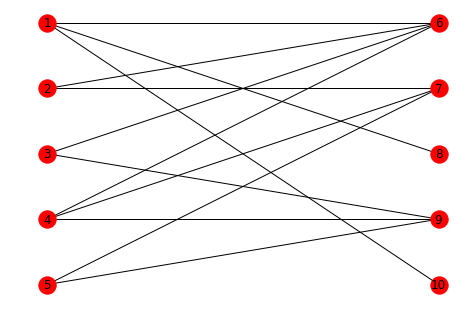

In [12]:
# 二部グラフの構成
G2 = nx.Graph()
G2.add_nodes_from(setA2)
G2.add_nodes_from(setB2)
G2.add_edges_from(edges2)
mypos2 = {}
for i in range(0, len(setA2)):
    mypos2[setA2[i]] = (10, 10*(len(setA2)-i))
for i in range(0, len(setB2)):
    mypos2[setB2[i]] = (20, 10*(len(setB2)-i))
nx.draw(G2, pos = mypos2, with_labels=True)

In [13]:
# 最大マッチングの計算 (完全マッチングではない)
nx.max_weight_matching(G2)

{(1, 10), (2, 7), (4, 6), (9, 3)}

In [14]:
# 完全マッチングが存在しないことを証明する頂点集合を見つけるために
# 最小頂点被覆を計算する
G2f = nx.DiGraph()
G2f.add_nodes_from(setA2)
G2f.add_nodes_from(setB2)
G2f.add_nodes_from(['s', 't'])
for e in edges2:
    G2f.add_edge(e[0], e[1], capacity=float("inf"))
for v in setA2:
    G2f.add_edge('s', v, capacity=1)
for v in setB2:
    G2f.add_edge(v, 't', capacity=1)
c2 = nx.minimum_cut(G2f, 's', 't')
vc2 = (set(setA2) - c2[1][0]) | (set(setB2) & c2[1][0])
print(vc2)

set([1, 7, 6, 9])


In [15]:
# 完全マッチングを持たないことの証拠となる頂点集合
setS2 = set(setA2) -vc2
print(setS2)

set([2, 3, 4, 5])


In [16]:
# 完全マッチングを持たないことの証拠となる頂点集合の近傍
setT2 = set()
for v in setS2:
    setT2 = setT2 | set(G2.neighbors(v))
print(setT2)

set([9, 6, 7])


In [17]:
# 頂点数の比較 (Falseとなるので，完全マッチングが存在しないことが分かる)
len(setS2) <= len(setT2)

False

# Hallの結婚定理の応用：トランプマジック？ 解答編

In [18]:
# 52枚のカードを作成 (ランダムにシャッフル)
ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
suits = ['S', 'H', 'D', 'C']
cards = list(itertools.product(ranks, suits))
random.shuffle(cards) # random を import する

In [19]:
# 4枚ずつの組に分ける
groups = list(zip(*[iter(cards)]*4))

In [20]:
# 組分け結果の表示
for i in range(0,13):
    print(groups[i])

(('7', 'D'), ('2', 'C'), ('5', 'S'), ('3', 'S'))
(('J', 'D'), ('2', 'H'), ('A', 'D'), ('4', 'S'))
(('7', 'C'), ('K', 'S'), ('Q', 'C'), ('9', 'H'))
(('6', 'H'), ('3', 'C'), ('8', 'D'), ('7', 'S'))
(('10', 'H'), ('Q', 'S'), ('K', 'C'), ('Q', 'H'))
(('10', 'D'), ('9', 'S'), ('J', 'S'), ('4', 'H'))
(('5', 'H'), ('8', 'H'), ('8', 'C'), ('J', 'C'))
(('6', 'D'), ('Q', 'D'), ('4', 'D'), ('2', 'S'))
(('K', 'H'), ('9', 'D'), ('A', 'S'), ('5', 'D'))
(('J', 'H'), ('8', 'S'), ('4', 'C'), ('2', 'D'))
(('10', 'C'), ('9', 'C'), ('6', 'C'), ('3', 'H'))
(('7', 'H'), ('A', 'C'), ('3', 'D'), ('5', 'C'))
(('6', 'S'), ('K', 'D'), ('A', 'H'), ('10', 'S'))


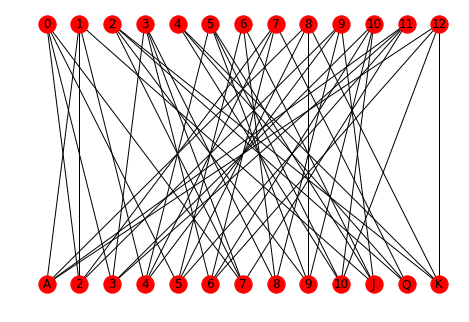

In [21]:
# 二部グラフの構成
G3 = nx.Graph()
G3.add_nodes_from(list(range(0,len(groups))))
G3.add_nodes_from(ranks)
for i in range(0,len(groups)):
    for c in groups[i]:
        G3.add_edge(i, c[0])
mypos3 = {}
for i in range(0, len(groups)):
    mypos3[i] = (10*i, 20)
for i in range(0, len(ranks)):
    mypos3[ranks[i]] = (10*i, 10)
nx.draw(G3, pos = mypos3, with_labels = True)

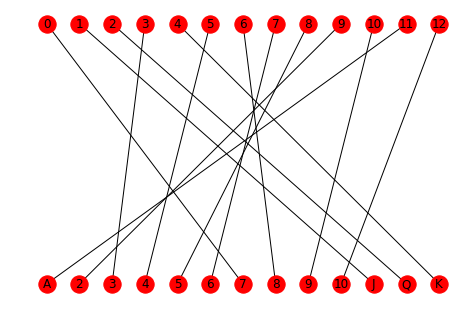

In [22]:
# 最大マッチングの計算と描画 (最大マッチングは完全マッチングになる)
m3 = nx.max_weight_matching(G3)
G3m = nx.Graph()
G3m.add_nodes_from(list(range(0,len(groups))))
G3m.add_nodes_from(ranks)
for e in m3:
    G3m.add_edge(*e)
nx.draw(G3m, pos = mypos3, with_labels=True)

In [23]:
# 完全マッチングによって選ばれたカードの表示
for e in G3m.edges():
    for c in groups[e[0]]:
        if c[0] == e[1]:
            print('{0} in {1}'.format(c, groups[e[0]]))

('7', 'D') in (('7', 'D'), ('2', 'C'), ('5', 'S'), ('3', 'S'))
('J', 'D') in (('J', 'D'), ('2', 'H'), ('A', 'D'), ('4', 'S'))
('Q', 'C') in (('7', 'C'), ('K', 'S'), ('Q', 'C'), ('9', 'H'))
('3', 'C') in (('6', 'H'), ('3', 'C'), ('8', 'D'), ('7', 'S'))
('K', 'C') in (('10', 'H'), ('Q', 'S'), ('K', 'C'), ('Q', 'H'))
('4', 'H') in (('10', 'D'), ('9', 'S'), ('J', 'S'), ('4', 'H'))
('8', 'H') in (('5', 'H'), ('8', 'H'), ('8', 'C'), ('J', 'C'))
('8', 'C') in (('5', 'H'), ('8', 'H'), ('8', 'C'), ('J', 'C'))
('6', 'D') in (('6', 'D'), ('Q', 'D'), ('4', 'D'), ('2', 'S'))
('5', 'D') in (('K', 'H'), ('9', 'D'), ('A', 'S'), ('5', 'D'))
('2', 'D') in (('J', 'H'), ('8', 'S'), ('4', 'C'), ('2', 'D'))
('9', 'C') in (('10', 'C'), ('9', 'C'), ('6', 'C'), ('3', 'H'))
('A', 'C') in (('7', 'H'), ('A', 'C'), ('3', 'D'), ('5', 'C'))
('10', 'S') in (('6', 'S'), ('K', 'D'), ('A', 'H'), ('10', 'S'))
